In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [17]:
df = pd.read_excel(r"LaptopPrice.xlsx")
df

,Company,TypeName,Inches,Ram,Weight,Price_euros
0,Apple,Ultrabook,13.3,8GB,1.37kg,1339.69
1,Apple,Ultrabook,13.3,8GB,1.34kg,898.94
2,HP,Notebook,15.6,8GB,1.86kg,575.00
3,Apple,Ultrabook,15.4,16GB,1.83kg,2537.45
4,Apple,Ultrabook,13.3,8GB,1.37kg,1803.60
...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4GB,1.8kg,638.00
1299,Lenovo,2 in 1 Convertible,13.3,16GB,1.3kg,1499.00
1300,Lenovo,Notebook,14.0,2GB,1.5kg,229.00
1301,HP,Notebook,15.6,6GB,2.19kg,764.00


In [18]:
df.head(10)

,Company,TypeName,Inches,Ram,Weight,Price_euros
0,Apple,Ultrabook,13.3,8GB,1.37kg,1339.69
1,Apple,Ultrabook,13.3,8GB,1.34kg,898.94
2,HP,Notebook,15.6,8GB,1.86kg,575.00
3,Apple,Ultrabook,15.4,16GB,1.83kg,2537.45
4,Apple,Ultrabook,13.3,8GB,1.37kg,1803.60
5,Acer,Notebook,15.6,4GB,2.1kg,400.00
6,Apple,Ultrabook,15.4,16GB,2.04kg,2139.97
7,Apple,Ultrabook,13.3,8GB,1.34kg,1158.70
8,Asus,Ultrabook,14.0,16GB,1.3kg,1495.00
9,Acer,Ultrabook,14.0,8GB,1.6kg,770.00


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Ram          1303 non-null   object 
 4   Weight       1303 non-null   object 
 5   Price_euros  1303 non-null   float64
dtypes: float64(2), object(4)
memory usage: 61.2+ KB


In [23]:
df['Ram'] = df['Ram'].apply(lambda x: x.replace('GB',''))
df['Weight'] = df['Weight'].apply(lambda x: x.replace('kg',''))
df

,Company,TypeName,Inches,Ram,Weight,Price_euros
0,Apple,Ultrabook,13.3,8,1.37,1339.69
1,Apple,Ultrabook,13.3,8,1.34,898.94
2,HP,Notebook,15.6,8,1.86,575.00
3,Apple,Ultrabook,15.4,16,1.83,2537.45
4,Apple,Ultrabook,13.3,8,1.37,1803.60
...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,1.8,638.00
1299,Lenovo,2 in 1 Convertible,13.3,16,1.3,1499.00
1300,Lenovo,Notebook,14.0,2,1.5,229.00
1301,HP,Notebook,15.6,6,2.19,764.00


In [59]:
df['Ram'] = df['Ram'].astype(int)
df['Inches'] = df['Inches'].astype(float)


In [24]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [25]:
df['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

In [26]:
X = df.iloc[:,:-1]
X

,Company,TypeName,Inches,Ram,Weight
0,Apple,Ultrabook,13.3,8,1.37
1,Apple,Ultrabook,13.3,8,1.34
2,HP,Notebook,15.6,8,1.86
3,Apple,Ultrabook,15.4,16,1.83
4,Apple,Ultrabook,13.3,8,1.37
...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,1.8
1299,Lenovo,2 in 1 Convertible,13.3,16,1.3
1300,Lenovo,Notebook,14.0,2,1.5
1301,HP,Notebook,15.6,6,2.19


In [27]:
y = df.iloc[:,-1]
y

0       1339.69
1        898.94
2        575.00
3       2537.45
4       1803.60
         ...   
1298     638.00
1299    1499.00
1300     229.00
1301     764.00
1302     369.00
Name: Price_euros, Length: 1303, dtype: float64

# tien xu ly du lieu

In [60]:
#chuyen kieu
X=pd.get_dummies(X, dtype = int, drop_first=True)
X.head(10)

,Inches,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,...,Weight_4.14,Weight_4.2,Weight_4.3,Weight_4.33,Weight_4.36,Weight_4.4,Weight_4.42,Weight_4.5,Weight_4.6,Weight_4.7
0,0.385542,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.385542,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.662651,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.638554,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.385542,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.662651,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.638554,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.385542,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.469880,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0.469880,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Columns: 214 entries, Inches to Weight_4.7
dtypes: float64(1), int32(213)
memory usage: 1.1 MB


# 1. TH du doan voi DL chua chuan hoa

# 2.TH du doan voi DL sau khi chuan hoa

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
#chuyen hoa Inches
scaler = MinMaxScaler()
X["Inches"] = scaler.fit_transform(X[["Inches"]])
X

,Inches,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,...,Weight_4.14,Weight_4.2,Weight_4.3,Weight_4.33,Weight_4.36,Weight_4.4,Weight_4.42,Weight_4.5,Weight_4.6,Weight_4.7
0,0.385542,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.385542,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.662651,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.638554,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.385542,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0.469880,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1299,0.385542,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1300,0.469880,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1301,0.662651,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=4)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((912, 214), (391, 214), (912,), (391,))

# KNN regresstion

In [45]:
knn_Reg = KNeighborsRegressor(n_neighbors=9)
knn_Reg.fit(X_train, y_train)
y_pred_knn = knn_Reg.predict(X_test)

#y_pred knn
print(pd.DataFrame({"y_test":y_test, "y_predicted": y_pred_knn}).head(10))

       y_test  y_predicted
665    498.00   511.720000
133    572.00   470.554444
516    521.47   738.163333
544    349.00   377.796667
237    575.00   483.438889
1288   369.00   483.438889
874   1849.00  2066.483333
1230  1650.00  1530.555556
703    621.45   418.988889
1090   393.49   494.727778


# danh gia

In [47]:
from sklearn.metrics import mean_absolute_error

In [49]:
MAE_KNN = mean_absolute_error(y_test, y_pred_knn)


print("MAE: ", MAE_KNN)



MAE:  269.2881131003126


# Linear regresstion

## y = coed_*x + intercept_

In [51]:
from sklearn.linear_model import LinearRegression

## HQTT don gian

## y = b1x + b0

In [53]:
reg = LinearRegression()
reg.fit([[1],[2], [3], [4], [5], [6]],[11, 11, 14, 16, 18, 20])

print(reg.coef_) #b1
print(reg.intercept_) #b0

[1.94285714]
8.2


## HQTT da bien

## y = w1x1 + w2x2 +...+wnxn +w0

In [55]:
Linear_Reg = LinearRegression()
Linear_Reg.fit(X_train, y_train)

y_predicted = Linear_Reg.predict(X_test)
#y_predicted
print(pd.DataFrame({"y_test":y_test, "y_predicted": y_predicted}).head(10))

       y_test  y_predicted
665    498.00    717.09375
133    572.00    339.75000
516    521.47    682.56250
544    349.00    562.37500
237    575.00    330.37500
1288   369.00    330.37500
874   1849.00   2024.96875
1230  1650.00   1423.46875
703    621.45    571.96875
1090   393.49    423.12500


In [62]:
# w = Linear_Reg.coef_
# w
w0 = Linear_Reg.intercept_
w0

182334437500828.03

In [76]:
y_pred_lin = Linear_Reg.predict(X_test)

#y_pred
print(pd.DataFrame({"y_test":y_test, "y_predicted": y_predicted}).head(10))


       y_test  y_predicted
665    498.00    717.09375
133    572.00    339.75000
516    521.47    682.56250
544    349.00    562.37500
237    575.00    330.37500
1288   369.00    330.37500
874   1849.00   2024.96875
1230  1650.00   1423.46875
703    621.45    571.96875
1090   393.49    423.12500


In [77]:
MAE_Linear = mean_absolute_error(y_test, y_pred_lin)


print("MAE Linear: ", MAE_Linear)



MAE Linear:  3488237152306.294


## So sanh ket qua

In [66]:
import matplotlib.pyplot as plt

In [81]:
x = ["MAE_KNN", "MAE_Linear"]
y = [MAE_KNN, MAE_Linear]
y

[269.2881131003126, 3488237152306.294]

Text(0.5, 1.0, 'so sanh KNN va Linear regression')

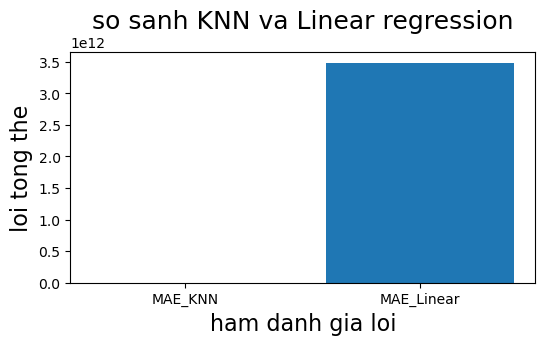

In [82]:
plt.figure(figsize=(6, 3))
plt.bar(x,y)
plt.xlabel("ham danh gia loi", fontsize = 16)
plt.ylabel("loi tong the", fontsize = 16)
plt.title("so sanh KNN va Linear regression", fontsize = 18)